In [82]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation and partial autocorrelation function
from statsmodels.tsa.stattools import adfuller # Augmented Dickie-Fuller test

%matplotlib inline

In [83]:
#load datasets
daily = pd.read_csv('../data/processed/data.csv')
monthly = pd.read_csv('../data/processed/monthly_data.csv')
annual = pd.read_csv('../data/processed/annual_data.csv')

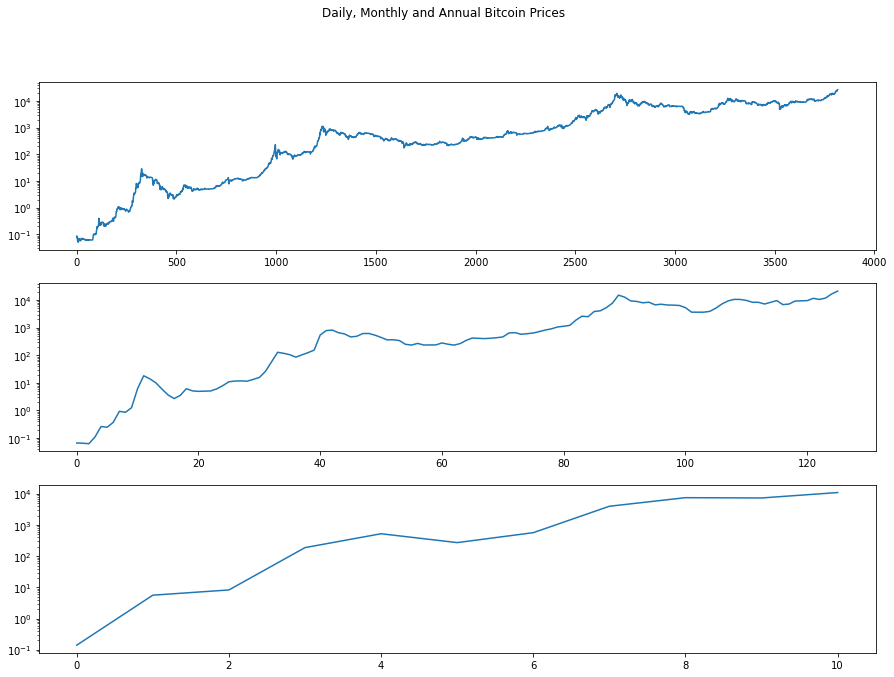

In [84]:
#btc price variable
btc_price_daily = daily['PriceUSD']
btc_price_monthly = monthly['PriceUSD']
btc_price_annual = annual['PriceUSD']


fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.yscale('log')
fig.suptitle('Daily, Monthly and Annual Bitcoin Prices')
fig.set_size_inches(15, 10.5)
ax1.plot(btc_price_daily)
ax1.set_yscale('log')
ax2.plot(btc_price_monthly)
ax2.set_yscale('log')
ax3.plot(btc_price_annual)
ax3.set_yscale('log')
plt.show()


#From the charts below we can observe that the bicoin price series seem to be non-stationary, 
#and clearly on an upward trend

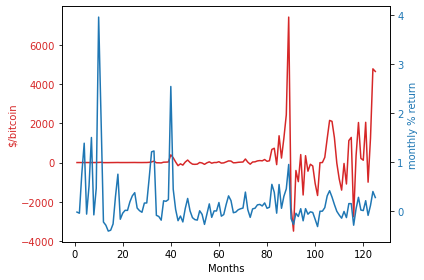

Descriptive statistics of mothly returns
count    125.000000
mean       0.177777
std        0.542213
min       -0.406599
25%       -0.069082
50%        0.046847
75%        0.236801
max        3.959536
Name: PriceUSD, dtype: float64
-----------------------------------------------
Descriptive statistics of mothly $ change
count     125.000000
mean      170.506216
std      1170.968760
min     -3494.460869
25%       -14.922015
50%         1.313300
75%        87.425467
max      7413.072838
Name: PriceUSD, dtype: float64


In [85]:
#Check if first differences seem stationary.
btc_price_monthly_diff = btc_price_monthly.diff()
btc_price_monthly_return = btc_price_monthly.pct_change()

#plot the mothly changes in $ and %
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('$/bitcoin', color=color)
ax1.plot(btc_price_monthly_diff, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('monthly % return', color=color)  
ax2.plot(btc_price_monthly_return, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

print('Descriptive statistics of mothly returns')
print(btc_price_monthly_return.describe())
print('-----------------------------------------------')
print('Descriptive statistics of mothly $ change')
print(btc_price_monthly_diff.describe())

#The monthly differences don't seem stationary, the volatility in $ terms has increased.
#% Change seen to have decreasing volatiltiy. 

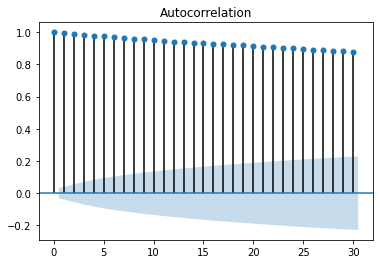

In [86]:
#Check for autocorrelation

plot_acf(btc_price_daily, lags=30, alpha=.05)
plt.show()

#daily price show a high autocorrelation even 30 days after.
#Monthly price also show high positive autocorrelation for about 9 months.
#Annual prices show 1 year of autocorrelation.
#Positive autocorrelation implies that bitcoin prices trade on momentum or trend following.

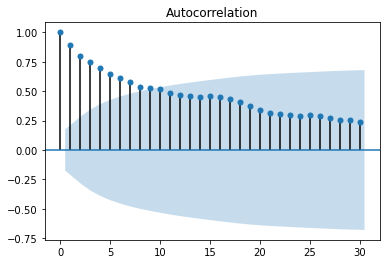

In [87]:
plot_acf(btc_price_monthly, lags=30, alpha=.05)
plt.show()

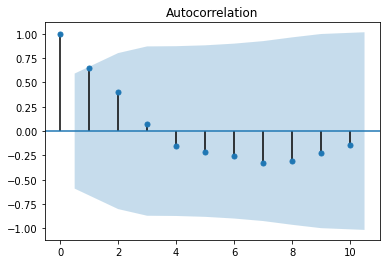

In [88]:
plot_acf(btc_price_annual, lags=10, alpha=.05)
plt.show()


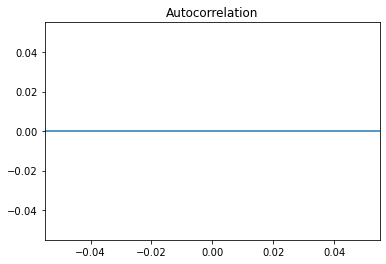

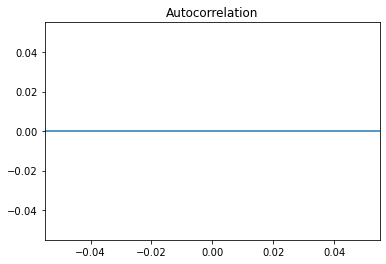

In [90]:
#autocorrelation of monthly returns
plot_acf(btc_price_monthly_return, lags=30, alpha=.05)
plt.show()

plot_acf(btc_price_monthly_diff, lags=30, alpha=.05)
plt.show()